<IPython.core.display.Javascript object>


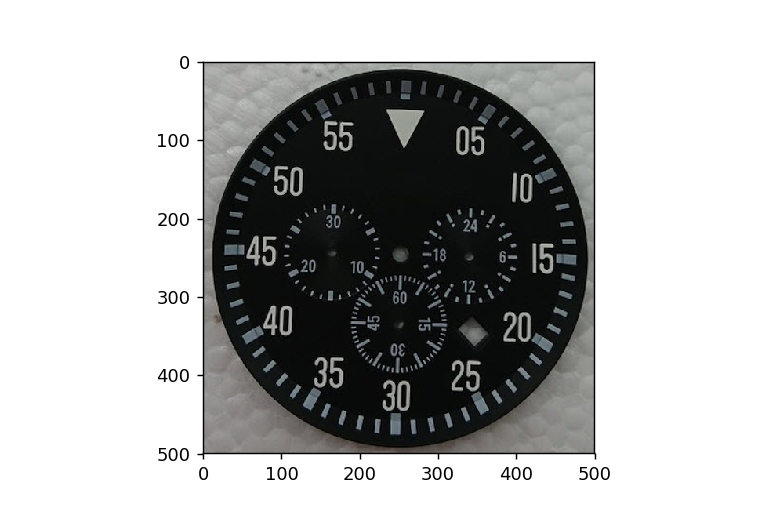

9

In [192]:
import numpy as np
import cv2
import os
from skimage.measure import compare_ssim
from skimage import io
from skimage.filters import threshold_mean, gaussian
from skimage.util import img_as_ubyte, img_as_float
from skimage.color import gray2rgb, rgb2grey
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import numpy as np
%matplotlib notebook
%config InlineBackend.close_figures=False 

SAVE_TITLE = "watch_labels.txt"
fig,ax = plt.subplots()
img = io.imread("sample/black_dials/good.png")
pic = img.copy()
ax.imshow(pic)
global drawmode
drawmode = "roi_box"
global pos, digits
pos = []; digits = []; key = []; rois = [];

def plot_bboxes(points, ax, color):
    for i in range(0, len(points)- len(points)%2, 2):
        p1 = points[i]
        p2 = points[i+1]
        lower_left_point = (min(p1[0],p2[0]), min(p1[1],p2[1]))
        upper_right_point = (max(p1[0],p2[0]), max(p1[1],p2[1]))
        w = max(p1[0],p2[0]) - min(p1[0], p2[0])
        h = max(p1[1],p2[1]) - min(p1[1], p2[1])
        rect = Rectangle(lower_left_point,w,h,linewidth=1,edgecolor=color,facecolor='none')
        ax.add_patch(rect)
def save_roi():
    # TODO THIS NEEDS TO CHANGGGGGGGE
    # TODO 2: careful about the x/y, i/j thing in opencv/skimage
    with open(SAVE_TITLE, "w") as savefile:
        general_roi = "".join(["{};{};roi; \n".format(i1,j1,i2,j2) for (i,j) in pos])
        digit_roi = "".join(["{};{};digit; \n".format(i,j) for (i,j) in digits])
        savefile.write(general_roi)
        savefile.write(digit_roi)
    
def onclick(event):
    if drawmode == "roi_box":
        pos.append((event.xdata,event.ydata))
    elif drawmode == "digits":
        digits.append((event.xdata,event.ydata))
    ax.scatter(*zip(*pos), color="red", s=4)
    # ax.scatter(*zip(*digits), color="green", s=4)
    plot_bboxes(pos, ax, "green")
    plot_bboxes(digits, ax, "blue")
    fig.show()

def onkey(event):
    if event.key == "u":
        key.append("resetting labels")
        plt.cla()
        global pos, digits
        pos = []; digits = [];
        pic = img.copy()
        ax.imshow(pic)
        fig.show()
    elif event.key == "d":
        key.append("labeling digits")
        global drawmode
        drawmode = "digits"
    elif event.key == "r":
        key.append("r registered")
        drawmode = "roi_box"
    elif event.key == "s":
        key.append("s registered")
        save_roi()
    #print "you pressed {} {} {}".format(event.key, event.xdata, event.ydata)
fig.canvas.mpl_connect('key_press_event', onkey)
fig.canvas.mpl_connect('button_press_event', onclick)

In [177]:
print key
print pos
print digits

with open(SAVE_TITLE, "w") as savefile:
    general_roi = "".join(["{};{};roi; \n".format(i,j) for (i,j) in pos])
    digit_roi = "".join(["{};{};digit; \n".format(i,j) for (i,j) in digits])
    savefile.write(general_roi)
    savefile.write(digit_roi)

['r registered', 'labeling digits', 'resetting labels', 'labeling digits', 'resetting labels', 'r registered', 'labeling digits', 'resetting labels', 'r registered', 'labeling digits', 'resetting labels', 'labeling digits', 'r registered', 'labeling digits', 's registered']
[(224.30782627445365, 52.864951473420888), (295.59185865120128, 124.14898385016846)]
[(146.12533915156916, 68.961345881073498), (199.01349220528516, 131.04743859630531), (86.338731351716319, 128.74795368092634), (134.62791457467443, 179.33662181926337), (54.145942536410985, 218.42786538070561), (102.43512575936904, 269.01653351904264), (72.541821859442621, 308.10777708048488), (123.13048999777965, 356.39696030344294), (136.92739949005335, 374.79283962647457), (192.11503745914831, 429.98047759556948), (222.00834135907473, 400.08717369564306), (272.5970094974117, 452.97532674935906), (313.98773797423291, 372.49335471109561), (359.97743628181206, 425.38150776481154), (378.3733156048437, 315.00623182662173), (428.961983

In [178]:
with open(SAVE_TITLE,"r") as readfile:
    dr = []
    br = []
    for line in readfile.readlines():
        lit = line.replace("\n","").split(";")
        # print lit
        if lit[2] == "digit":
            dr.append([float(n) for n in lit[:2]])
        elif lit[2] == "roi":
            br.append([float(n) for n in lit[:2]])
print dr[0]

[146.125339152, 68.9613458811]


73.3428571429 7.01587301587
1.09484777518 0.0746487119438
2.55190796857 0.119248035915
(510, 510, 3) (510, 510, 3)


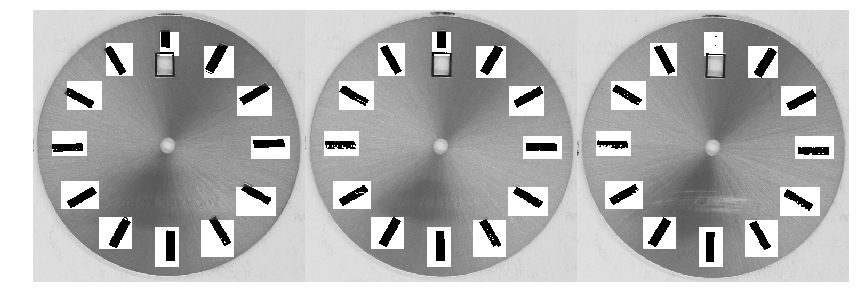

In [148]:
## compare stuff here:
%matplotlib inline
def quick_fig(img):
    plt.figure(figsize=(16,5)) 
    plt.imshow(img)
    plt.axis("off")
gd1 = io.imread("good_cropped/g1.png")
gd2 = io.imread("good_cropped/g4.png")
bd = io.imread("good_cropped/b3.png")

for i in range(0, len(br)- len(br)%2, 2):
    p1 = tuple([int(n) for n in br[i]])
    p2 = tuple([int(n) for n in br[i+1]])
    x1,y1 = p1
    x2,y2 = p2
    threshes = []
    for IM in (gd1,gd2,bd):
        # print threshold_mean(IM[y1:y2,x1:x2])
        jill = IM[y1:y2,x1:x2]
        gill = gd[y1:y2,x1:x2]
        thresh = np.mean(gill)
        jill[jill>thresh] = 255
        jill[jill<thresh] = 0
        nu_thresh = np.mean(jill)
        threshes.append(nu_thresh)
   
    #print threshes[0] - threshes[1]
    #print threshes[2] - threshes[0]
    if abs(threshes[2] - threshes[0]) > 5*abs(threshes[1] - threshes[0]):
        print abs(threshes[2] - threshes[0]), abs(threshes[1] - threshes[0])
        for IM in (gd1,gd2,bd):
            #(gd1,gd2,bd):
            # tungalunga = threshes[2] - threshes[0]
            # cv2.rectangle(IM, p1, p2, (0,0,255), -1)
            pass
    # print "newline"
        #cv2.rectangle(IM, p1, p2, (0,0,255), -1)

print gd.shape, bd.shape
quick_fig(np.hstack([gd1,gd2,bd]))
# image2





45

‘40

35





20.
20.
|5'

IU‘
IU‘
05
05
Sample Image 2


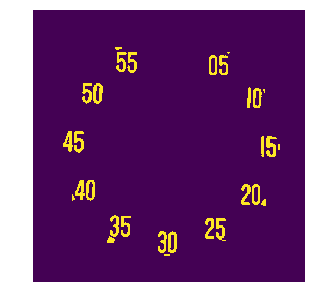

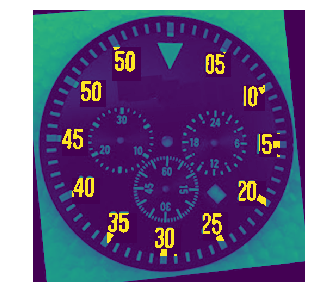

In [210]:
# copied for more work...
## compare stuff here:
from PIL import Image
import pytesseract

%matplotlib inline

def quick_fig(img):
    plt.figure(figsize=(16,5)) 
    plt.imshow(img)
    plt.axis("off")
gd = rgb2grey(io.imread("sample/black_dials/good.png"))
bd = io.imread("sample/black_dials/macho_libre.png")

for i in range(0, len(dr)- len(dr)%2, 2):
    p1 = tuple([int(n) for n in dr[i]])
    p2 = tuple([int(n) for n in dr[i+1]])
    x1,y1 = p1
    x2,y2 = p2
    #cv2.rectangle(gd, p1, p2, 0, -1)
    #cv2.rectangle(bd, p1, p2, 0, -1)
    mugo = gd[y1:y2,x1:x2]
    bugo = bd[y1:y2,x1:x2]
    mean = np.mean(mugo)
    bean = np.mean(bugo)
    mugo[mugo>mean]=255
    mugo[mugo<mean]=0
    bugo[bugo>bean]=255
    bugo[bugo<bean]=0
    print pytesseract.image_to_string(Image.fromarray(mugo))
    print pytesseract.image_to_string(Image.fromarray(bugo))
    
print pytesseract.image_to_string(Image.open('tess_work.png'))
quick_fig(gd)
quick_fig(bd)
plt.show()